<a href="https://colab.research.google.com/github/lfnd0/Machine_Learning/blob/master/ML_Atividade_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede neural convolucional (CNN) com expressões faciais

> Dataset: [Facial recognition dataset](https://www.kaggle.com/apollo2506/facial-recognition-dataset)

## 1. Leitura dos dados

In [ ]:
from google.colab import drive

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

### 1.1 Tipos de expressões faciais


*   Angry - raiva
*   Fear - medo
*   Happy - felicidade
*   Neutral - neutro
*   Sad - tristeza
*   Surprise - surpresa

### 1.2 Leitura e transformação de imagem

#### 1.2.1 Leitura de imagem

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
img_example = cv2.imread('/content/drive/My Drive/Machine_Learning/Datasets/Atividade_6/Training/Angry/Angry-1.jpg')

In [ ]:
img_example.shape

(48, 48, 3)

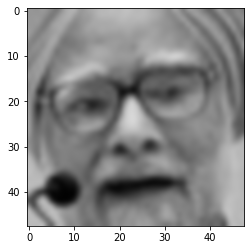

In [ ]:
plt.imshow(img_example, cmap='gray', interpolation='bicubic')
plt.show()

#### 1.2.2 Transformação da imagem em matriz de pixels

In [ ]:
img_pixels = np.asarray(img_example)
img_pixels

array([[[152, 152, 152],
        [149, 149, 149],
        [147, 147, 147],
        ...,
        [129, 129, 129],
        [139, 139, 139],
        [121, 121, 121]],

       [[149, 149, 149],
        [152, 152, 152],
        [150, 150, 150],
        ...,
        [121, 121, 121],
        [146, 146, 146],
        [135, 135, 135]],

       [[152, 152, 152],
        [152, 152, 152],
        [157, 157, 157],
        ...,
        [112, 112, 112],
        [121, 121, 121],
        [145, 145, 145]],

       ...,

       [[187, 187, 187],
        [189, 189, 189],
        [120, 120, 120],
        ...,
        [184, 184, 184],
        [185, 185, 185],
        [188, 188, 188]],

       [[188, 188, 188],
        [189, 189, 189],
        [193, 193, 193],
        ...,
        [185, 185, 185],
        [181, 181, 181],
        [189, 189, 189]],

       [[186, 186, 186],
        [185, 185, 185],
        [183, 183, 183],
        ...,
        [193, 193, 193],
        [181, 181, 181],
        [183, 183, 183]]

#### 1.2.3 Leitura de todas as imagens

In [ ]:
inp_dir = '/content/drive/My Drive/Machine_Learning/Datasets/Atividade_6/'

In [ ]:
cls = {'Angry':0, 'Fear': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4, 'Suprise': 5}

In [ ]:
def read_dataset(tp):
    x = []
    y = []
    qtt = 1000 if tp == 'Training' else 200
    for folder in os.listdir(inp_dir + tp + '/'):
        print(folder)

        for img_file in os.listdir(inp_dir + tp + '/' + folder + '/')[:qtt]:
            img = cv2.imread(inp_dir + tp + '/' + folder + '/' + img_file)
            x.append(img)
            y.append(cls[folder])
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

## 2. Treinamento e teste

### 2.1 Treinamento

In [ ]:
x_train, y_train = read_dataset('Training')

Neutral
Suprise
Happy
Fear
Angry
Sad


In [ ]:
x_train.shape

(6000, 48, 48, 3)

In [ ]:
y_train.shape

(6000,)

### 2.2 Teste

In [ ]:
x_test, y_test = read_dataset('Testing')

Happy
Angry
Fear
Suprise
Sad
Neutral


In [ ]:
x_test.shape

(1200, 48, 48, 3)

In [ ]:
y_test.shape

(1200,)

### 2.3 Transformação das *labels* numéricas para categóricas

In [ ]:
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

## 3. Re-escala dos dados, definição da CNN e treinamento

### 3.1 Re-escala dos dados

In [ ]:
x_train = x_train/255
x_test = x_test/255

### 3.2 Definição da CNN

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(48, 48, 3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [ ]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 48, 48, 32)        2432      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 64)      

### 3.3 Treinamento do modelo

In [ ]:
model.fit(x_train, y_train, epochs=1, verbose=1)

188/188 [==============================] - 234s 1s/step - loss: 1.8153 - accuracy: 0.1673


In [ ]:
model.evaluate(x_test, y_test)

38/38 [==============================] - 11s 283ms/step - loss: 1.7919 - accuracy: 0.1667


[1.7918758392333984, 0.1666666716337204]

## 4. Avaliação do modelo

In [ ]:
model.evaluate(x_test, y_test)

38/38 [==============================] - 11s 289ms/step - loss: 1.7918 - accuracy: 0.1667


[1.7918295860290527, 0.1666666716337204]

## 5. Considerações

De acordo com os resultados apresentadas na  Seção 4, conforme aplicação do modelo criado na Subseção 3.2 e do treino realizado na Subseção 3.3, observa-se que a taxa de acurácia é de 16,67%, um valor que pode ser considerado baixo para o modelo citado.

Ações que podem alcançar resultados melhores envolvem: 1) a troca para uma quantidade maior de imagens trabalhadas no treino (acima do que foi definido na Subseção 1.2.3) e/ou 2) alterar o número de épocas para o treinamento.